# **Colab環境使用深度學習模型訓練Cifar10資料集**

# **載入相關套件**

In [349]:
# Simple CNN model for the CIFAR-10 Dataset
import numpy
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

# **資料準備**

In [350]:
(X_img_train, y_label_train), (X_img_test, y_label_test) = cifar10.load_data()
print("train data:",'images:',X_img_train.shape," labels:",y_label_train.shape) 
print("test  data:",'images:',X_img_test.shape ," labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


# **輸入資料做正規化處理**

In [351]:
X_img_train_normalize = X_img_train.astype('float32') / 255.0
X_img_test_normalize = X_img_test.astype('float32') / 255.0

# **輸出 label 做 OneHot 處理**

In [352]:
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)

In [353]:
y_label_test_OneHot.shape

(10000, 10)

#**建立模型**

In [354]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [355]:
model = Sequential()

#**卷積層1與池化層1**

In [356]:
model.add(Conv2D(filters=32,kernel_size=(3, 3),input_shape=(32, 32,3),activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size=(3, 3),activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#**卷積層2與池化層2**

In [357]:
model.add(Conv2D(filters=64, kernel_size=(3, 3),
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#**卷積層3與池化層3**

In [358]:
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(Dropout(0.3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))

#**建立神經網路(平坦層、隱藏層、輸出層)**

In [359]:
model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(2500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1500, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

In [360]:
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_66 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_66 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_67 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_33 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_68 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_67 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_69 (Conv2D)           (None, 16, 16, 64)      

# **載入之前訓練的模型**

In [361]:
try:
    model.load_weights("SaveModel/cifarCnnModelnew.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# **訓練模型**

In [362]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [363]:
train_history=model.fit(X_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=1, batch_size=300, verbose=1)     

134/134 [==============================] - 5s 38ms/step - loss: 1.9862 - accuracy: 0.2534 - val_loss: 1.7887 - val_accuracy: 0.3475


In [364]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [365]:
#show_train_history('loss','val_loss')

# **評估模型準確率**

In [366]:
scores = model.evaluate(X_img_test_normalize, 
                        y_label_test_OneHot,verbose=0)
scores[1]

0.34940001368522644

# **進行預測**

In [367]:
prediction=model.predict_classes(X_img_test_normalize)

In [368]:
prediction[:10]

array([5, 9, 8, 8, 4, 6, 5, 4, 4, 1])

In [369]:
label_dict={0:"airplane",1:"automobile",2:"bird",3:"cat",4:"deer",
            5:"dog",6:"frog",7:"horse",8:"ship",9:"truck"}

In [370]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images,labels,prediction,
                                  idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num>25: num=25 
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx],cmap='binary')
                
        title=str(i)+','+label_dict[labels[i][0]]
        if len(prediction)>0:
            title+='=>'+label_dict[prediction[i]]
            
        ax.set_title(title,fontsize=10) 
        ax.set_xticks([]);ax.set_yticks([])        
        idx+=1 
    plt.show()

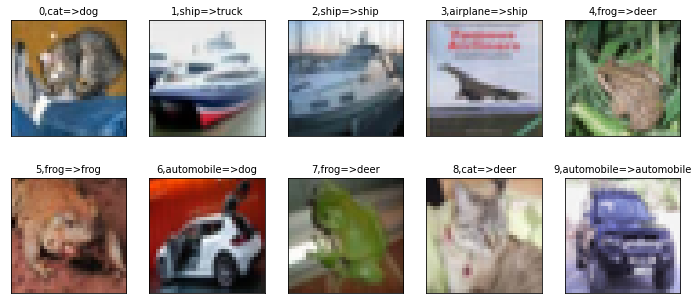

In [371]:
plot_images_labels_prediction(X_img_test_normalize,y_label_test,prediction,0,10)

# **查看預測機率**

In [372]:
Predicted_Probability=model.predict(X_img_test_normalize)

In [373]:
def show_Predicted_Probability(X_img,Predicted_Probability,i):
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(X_img_test[i],(32, 32,3)))
    plt.show()
    for j in range(10):
        print(label_dict[j]+' Probability:%1.9f'%(Predicted_Probability[i][j]))

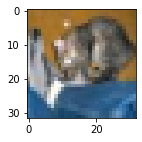

airplane Probability:0.029082747
automobile Probability:0.012597213
bird Probability:0.107825369
cat Probability:0.216179624
deer Probability:0.087239183
dog Probability:0.328383744
frog Probability:0.117018811
horse Probability:0.070683174
ship Probability:0.022232421
truck Probability:0.008757634


In [374]:
show_Predicted_Probability(X_img_test,Predicted_Probability,0)

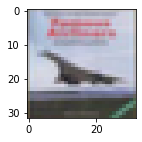

airplane Probability:0.150147974
automobile Probability:0.161826298
bird Probability:0.084315173
cat Probability:0.054492805
deer Probability:0.082467817
dog Probability:0.051487707
frog Probability:0.041686222
horse Probability:0.055861466
ship Probability:0.182830930
truck Probability:0.134883627


In [375]:
show_Predicted_Probability(X_img_test,Predicted_Probability,3)

# **Save model to JSON**

In [376]:
model_json = model.to_json()
with open("cifarCnnModelnew.json", "w") as json_file:
    json_file.write(model_json)

# **Save Weight to h5**

In [377]:
model.save_weights("cifarCnnModelnew.h5")
print("Saved model to disk")
!pwd
!ls

Saved model to disk
/content
cifarCnnModelnew.h5  cifarCnnModelnew.json  gdrive  sample_data


# **儲存訓練完的模型到 Google Drive**

In [381]:
#將 /content/gdrive GoogleDrive 載入虛擬機器硬碟  
from google.colab import drive
drive.mount('/content/gdrive')
!ln -fs /content/gdrive/My\ Drive /app
#!ln -fs /content/gdrive /app

!cp /content/cifarCnnModelnew.h5 /app/Data
!cd /app/Data
!ls

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
ln: failed to create symbolic link '/app/My Drive': Input/output error
cifarCnnModelnew.h5  cifarCnnModelnew.json  gdrive  sample_data
